In [19]:
#Adaboost
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics,datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
%matplotlib inline

## boston房价预测--回归

In [20]:
boston = datasets.load_boston()
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [21]:
X_boston= boston.data
y_boston = boston.target

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_boston, y_boston, test_size=0.33, random_state=42)

In [23]:
# Adaboost
ml_reg = AdaBoostRegressor()
ml_reg.fit(X_train,y_train)
y_pred = ml_reg.predict(X_test)
print(metrics.mean_absolute_error(y_test,y_pred))
print(metrics.mean_squared_error(y_test,y_pred))

2.7073330635332717
14.709147535171335


In [24]:
# tree
ml_tree = DecisionTreeRegressor()
ml_tree.fit(X_train,y_train)
y_pred = ml_tree.predict(X_test)
print(metrics.mean_absolute_error(y_test,y_pred))
print(metrics.mean_squared_error(y_test,y_pred))

2.8191616766467065
17.15101796407186


### 随机数据----AdaBoost 与决策树模型的比较

In [25]:
X,y = datasets.make_hastie_10_2(n_samples=12000,random_state=1)
X.shape

(12000, 10)

In [26]:
# 从12000个数据中取前2000行作为测试集，其余作为训练集
X_train, y_train = X[2000:],y[2000:]
X_test,  y_test= X[:2000],y[:2000]

In [27]:
# 弱分类器
dt_stump = DecisionTreeClassifier(max_depth=1,min_samples_leaf=1)
dt_stump.fit(X_train, y_train)
dt_stump_err = 1.0-dt_stump.score(X_test, y_test)
dt_stump_err

0.45199999999999996

In [28]:
# tree
dt_tree = DecisionTreeClassifier()
dt_tree.fit(X_train, y_train)
dt_tree_err = 1.0-dt_tree.score(X_test, y_test)
dt_tree_err

0.20950000000000002

In [29]:
# AdaBoost分类器
ada = AdaBoostClassifier(base_estimator=dt_stump,n_estimators=200)
ada.fit(X_train, y_train)
ada_err = 1.0-ada.score(X_test, y_test)
ada_err

0.05349999999999999

In [30]:
# 三个分类器的错误率可视化
fig = plt.figure()
# 设置plt正确显示中文
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']

<Figure size 432x288 with 0 Axes>

In [31]:
ax = fig.add_subplot(111)
ax.plot([1,200],[dt_stump_err]*2, 'k-', label=u'决策树弱分类器 错误率')
ax.plot([1,200],[dt_tree_err]*2,'k--', label=u'决策树模型 错误率')
ada_err = np.zeros((200,))

In [32]:
# 遍历每次迭代的结果 i为迭代次数, pred_y为预测结果
for i,y_pred in enumerate(ada.staged_predict(X_test)): 
    # 统计错误率 
    ada_err[i]=metrics.zero_one_loss(y_pred, y_test)

In [33]:
ada_err

array([0.452 , 0.419 , 0.387 , 0.361 , 0.333 , 0.325 , 0.318 , 0.3165,
       0.31  , 0.3155, 0.3205, 0.314 , 0.296 , 0.2795, 0.2565, 0.2425,
       0.228 , 0.219 , 0.211 , 0.197 , 0.195 , 0.1955, 0.195 , 0.1875,
       0.191 , 0.1865, 0.1905, 0.185 , 0.182 , 0.181 , 0.1745, 0.1705,
       0.1675, 0.1645, 0.1595, 0.1565, 0.154 , 0.1495, 0.153 , 0.149 ,
       0.149 , 0.1465, 0.1455, 0.1445, 0.146 , 0.141 , 0.1355, 0.136 ,
       0.1355, 0.138 , 0.14  , 0.141 , 0.139 , 0.1395, 0.134 , 0.1235,
       0.1175, 0.1145, 0.121 , 0.121 , 0.1185, 0.118 , 0.1155, 0.1105,
       0.1085, 0.106 , 0.1085, 0.1075, 0.1045, 0.104 , 0.1025, 0.0995,
       0.098 , 0.1035, 0.1025, 0.1025, 0.096 , 0.0955, 0.0955, 0.097 ,
       0.099 , 0.096 , 0.0965, 0.098 , 0.1005, 0.097 , 0.094 , 0.0915,
       0.091 , 0.092 , 0.0935, 0.089 , 0.091 , 0.089 , 0.0875, 0.0905,
       0.0915, 0.087 , 0.0875, 0.085 , 0.088 , 0.086 , 0.084 , 0.0865,
       0.0835, 0.0805, 0.082 , 0.0785, 0.0795, 0.079 , 0.082 , 0.0795,
      

In [34]:
# # 绘制每次迭代的AdaBoost错误率 
# ax.plot(np.arange(200)+1, ada_err, label='AdaBoost Test 错误率', color='orange')
# ax.set_xlabel('迭代次数')
# ax.set_ylabel('错误率')
# leg=ax.legend(loc='upper right',fancybox=True)
# plt.show()

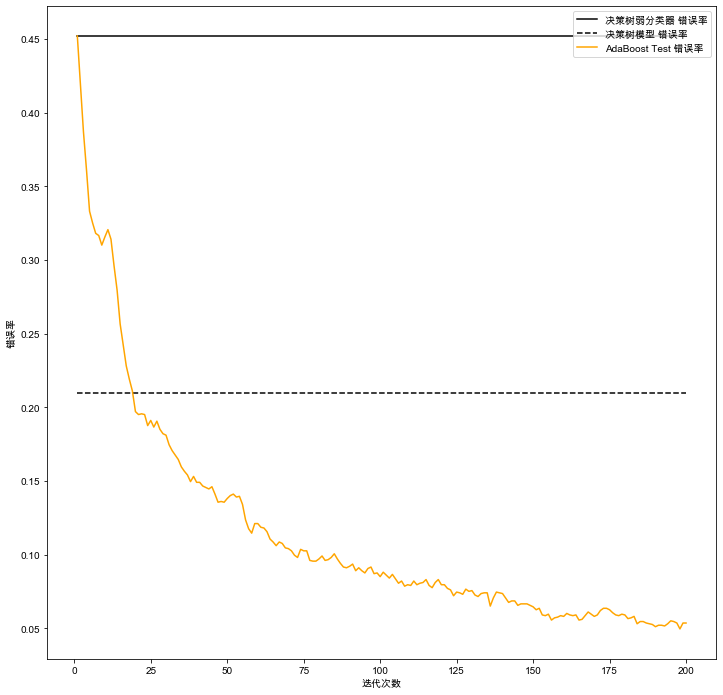

<Figure size 864x864 with 0 Axes>

In [37]:
# 三个分类器的错误率可视化
fig = plt.figure(figsize=(12,12))
# 设置plt正确显示中文
# plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
ax = fig.add_subplot(111)
ax.plot([1,200],[dt_stump_err]*2, 'k-', label=u'决策树弱分类器 错误率')
ax.plot([1,200],[dt_tree_err]*2,'k--', label=u'决策树模型 错误率')
ada_err = np.zeros((200,))
# 遍历每次迭代的结果 i为迭代次数, pred_y为预测结果
for i,y_pred in enumerate(ada.staged_predict(X_test)): 
    # 统计错误率 
    ada_err[i]=metrics.zero_one_loss(y_pred, y_test)
# 绘制每次迭代的AdaBoost错误率 
ax.plot(np.arange(200)+1, ada_err, label='AdaBoost Test 错误率', color='orange')
ax.set_xlabel('迭代次数')
ax.set_ylabel('错误率')
leg=ax.legend(loc='upper right',fancybox=True)
plt.figure(figsize=(12,12))
plt.show()
    